In [122]:
import numpy as np
import math
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## ---------------------------- QUESTION 1-A ----------------------------
The optimization function for the linear maximum margin optimization problem is given by:

Maximize: 2/||w|| subject to yi(w^T xi + b) >= 1, for i = 1,2,...,n.

where,

w is the weight vector
b is the bias term
xi is the feature vector of the ith example
yi is the label of the ith example (+1 or -1)
The constraints require that all examples lie on the correct side of the decision boundary with a margin of at least 1/||w||.

In this case, we have two features, so w = [w1, w2] and xi = [x1i, x2i].

Now, we can write the optimization function as:

Maximize: 2/√(w1^2 + w2^2) subject to yi(w1x1i + w2x2i + b) >= 1, for i = 1,2,...,n.

To derive the Lagrangian, we introduce Lagrange multipliers αi for each of the constraints:

L(w, b, α) = 2/√(w1^2 + w2^2) - Σ αi [yi (w1 x1i + w2 x2i + b) - 1]

To find the dual of the Lagrangian, we need to solve for w and b in terms of the Lagrange multipliers:

w = Σ αi yi xi
0 = Σ αi yi

Substituting these values back into the Lagrangian, we get the Lagrangian Dual:

L_Dual(α) = Σ αi - 1/2 Σ Σ αi αj yi yj xi^T xj

where, the first summation is over all examples, and the second summation is over all pairs of examples.

The constraints on α are: αi >= 0, and Σ αi yi = 0, for i = 1,2,...,n.

## ---------------------------- QUESTION 1-B ----------------------------
The SMO (Sequential Minimal Optimization) algorithm is a widely used optimization technique for training support vector machines (SVMs). Here are the general steps to perform 3 iterations of the SMO algorithm on this data:

Step 1: Initialize α, w, and b

Set all α_i = 0
Initialize b = 0
Initialize w = 0
Step 2: Pick two α parameters for optimization

Choose one α_i from C1 and another α_j from C2, where α_i and α_j are not equal
Compute the error for α_i and α_j: E_i = f(x_i) - y_i and E_j = f(x_j) - y_j, where f(x) = w·x + b and y is the target value (+1 or -1)
Step 3: Compute the new unconstrained (unclipped) α values that maximize the modified performance function

Compute η = K(x_i, x_i) + K(x_j, x_j) - 2K(x_i, x_j), where K is the kernel function (in this case, we can use the linear kernel)
Compute the new unconstrained value for α_j: α_j_new_unc = α_j + y_j(E_i - E_j)/η
Compute the new unconstrained value for α_i: α_i_new_unc = α_i + y_iy_j(α_j - α_j_new_unc)
Step 4: Clip the new α values to ensure that both α values are ≥ 0

Clip α_i_new to be between 0 and C_i
Clip α_j_new to be between 0 and C_j, where C_i and C_j are the regularization parameters for the two classes (in this case, we can assume C_i = C_j = 1)
Step 5: Compute the new value for b

If 0 < α_i_new < C_i and 0 < α_j_new < C_j, then set b_new = b - E_i - y_iK(x_i, x_i)(α_i_new - α_i) - y_jK(x_i, x_j)(α_j_new - α_j)
Otherwise, if either α_i_new = 0 or α_i_new = C_i, then set b_new = b - E_i - y_iK(x_i, x_i)(α_i_new - α_i) - y_jK(x_i, x_j)(α_j_new - α_j) + (y_i - y_j)ξ_i
Otherwise, if either α_j_new = 0 or α_j_new = C_j, then set b_new = b - E_i - y_iK(x_i, x_i)(α_i_new - α_i) - y_jK(x_i, x_j)(α_j_new - α_j) + (y_i - y_j)ξ_j
where ξ_i = f(x_i) + b_new - y_i and ξ_j = f(x_j) + b_new - y_j are the new values of the functional margin for the two support vectors
Step 6: Update w to reflect the new α values

Compute w_new = sum(α_i_newy_ix_i) for all support vectors with non-zero α values
Step 7: Repeat steps 2-6 for a total of 3 iterations, or until convergence

Unfortunately, I cannot provide a plot of the data points with the decision boundary described by the values of w and b that you obtained as I'm a text-based AI language model. However, you can plot the data and decision boundary using Python's Matplotlib library or any other suitable






In [205]:
def read_data(filename='./data_q1.txt'):
    """
    Load the dataset for question 1 provided with the homework.
    
    Parameters
    ----------
    filename - string
    
    Returns
    -------
    data - numpy array of floats
    labels - numpy array of integers
    """
    data = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            x1, x2, label = float(line[0]), float(line[1]), int(line[2][1:])
            data.append([x1, x2])
            labels.append(label)
    return np.array(data), np.array(labels)

In [116]:
data_q1, labels_q1 = read_data()

data_q1, labels_q1

(array([[ 4.08,  0.56],
        [-3.92,  1.36],
        [ 2.52, -1.56],
        [-1.88, -2.76],
        [ 1.6 ,  5.6 ],
        [-3.28,  1.84],
        [ 0.64,  2.88],
        [-4.  ,  4.  ],
        [ 4.04, -0.52],
        [-4.8 ,  0.8 ]]),
 array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2]))

## ---------------------------- QUESTION 2 ----------------------------

In [206]:
## load the larger dataset from homework 1
with open('data_old.txt') as f:
    data_old = f.readlines()
    f.close()

In [207]:
def format_data(data_old):
    """
    format the dataset into numpy arrays of features and labels
    
    Parameters
    ----------
    data_old - list of strings
    
    Returns
    -------
    feat_array - numpy array of features
    label_array - numpy array of labels
    """
    feat_array = []
    label_array = []
    
    for row in data_old:
        ## Splitting the string using comma separator and removing the newline character
        data_list = row.replace(',\n','').strip().split(",")

        ## Converting the first 4 elements to a numpy array of floats
        feat_array.append([float(i) for i in data_list[:4]])

        ## Converting the 5th element to a numpy array of strings
        label_array.append(data_list[4].replace("'", ""))
        
    return np.array(feat_array), np.array(label_array)

In [208]:
features, labels = format_data(data_old)

In [209]:
def train_test_split(features, labels):
    """
    split the dataset into train-test as specified in the problem statement
    considering the first 6 values of each material type to make the testing dataset
    rest of the data is training dataset
    
    Parameters
    ----------
    features - numpy array of floats
    labels - numpy array of strings
    
    Returns
    -------
    train_features - numpy array of floats
    test_features - numpy array of floats
    train_labels - numpy array of strings
    test_labels - numpy array of strings
    
    """
    # Get unique labels
    unique_labels = np.unique(labels)

    # Initialize train and test data
    train_features, test_features, train_labels, test_labels = [], [], [], []

    # Loop through each label
    for label in unique_labels:
        # Get indices of occurrences of the label in the labels array
        label_indices = np.where(labels == label)[0]
        # Pick the first 6 occurrences for test and the rest for train
        test_indices = label_indices[:6]
        train_indices = label_indices[6:]
        # Append the corresponding features and labels to the train and test sets
        test_features.append(features[test_indices])
        test_labels.append(labels[test_indices])
        train_features.append(features[train_indices])
        train_labels.append(labels[train_indices])
        
    # Concatenate the train and test sets
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
        
    return train_features, test_features, train_labels, test_labels

In [210]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [211]:
def model_svm_iters(train_features, 
                    test_features, 
                    train_labels, 
                    test_labels, 
                    c_list = [1,10,100,200],
                    kernal = 'linear',
                    gamma = 'scale',
                    perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}
                    ):
    """
    Parameters
    ----------
    train_features - numpy array of floats
    test_features - numpy array of floats
    train_labels - numpy array of strings
    test_labels - numpy array of strings
    c_list - list of integers
    kernal - 'linear' or 'rbf' or 'poly'
    perf_comp - dictionary to solve the model, configuration, training and testing accuracies for comparison
    
    Returns
    -------
    perf_comp - dictionary with saved model, configuration, training and testing accuracies to compare later
    
    """
    # Train the SVM model with a non-zero regularization weight C
    for c in c_list:
        if kernal == 'rbf':
            # train the SVM model with Gaussian Kernels
            clf = SVC(kernel='rbf', C=c, gamma='scale')
        else:
            clf = SVC(kernel='linear', C=c)
            
        clf.fit(train_features, train_labels)
        
        # Test the model on the testing set and calculate the classification accuracy
        y_pred_train = clf.predict(train_features)
        y_pred_test = clf.predict(test_features)

        accuracy_train = 100*(np.mean(train_labels == y_pred_train))
        accuracy_test = 100*(np.mean(test_labels == y_pred_test))
        
        print('For C = {} -----'.format(c))
        print('Training Accuracy: {}%'.format(round(accuracy_train,2)))
        print('Testing Accuracy: {}%\n'.format(round(accuracy_test,2)))
        
        perf_comp['model'].append(clf)
        perf_comp['c'].append(c)
        perf_comp['acc_train'].append(accuracy_train)
        perf_comp['acc_test'].append(accuracy_test)
    
    return perf_comp

## ------------------------------------ QUESTION 2-A ------------------------------------

Following are the steps:

- Load the dataset and split it into training and testing sets (DONE ALREADY).
- Train the SVM model on the training set.
- Test the model on the testing set and calculate the classification accuracy.
- Visualize the decision boundary and the support vectors.

In [212]:
## data edit for this question
train_labels_edit = [i if i=='Plastic' else 'Other' for i in train_labels]
test_labels_edit = [i if i=='Plastic' else 'Other' for i in test_labels]

In [213]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,50,100], 
                            kernal='linear',
                            gamma=None,
                            perf_comp=perf_comp)

For C = 1 -----
Training Accuracy: 69.61%
Testing Accuracy: 61.11%

For C = 5 -----
Training Accuracy: 85.29%
Testing Accuracy: 72.22%

For C = 10 -----
Training Accuracy: 97.06%
Testing Accuracy: 100.0%

For C = 50 -----
Training Accuracy: 100.0%
Testing Accuracy: 100.0%

For C = 100 -----
Training Accuracy: 100.0%
Testing Accuracy: 100.0%



### OBSERVATION - 
- As we can see, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 10.__
- We can clearly see that for C = 50, 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.

In [214]:
labels_all = np.concatenate([train_labels_edit, test_labels_edit])
features_all = np.concatenate([train_features, test_features])

In [215]:
perf_comp['acc_train'], perf_comp['acc_test']

([69.6078431372549, 85.29411764705883, 97.05882352941177, 100.0, 100.0],
 [61.111111111111114, 72.22222222222221, 100.0, 100.0, 100.0])

In [216]:
## choose the best model
clf = perf_comp['model'][2]

In [217]:
is_plastic = np.array(train_labels_edit).ravel()=='Plastic'
is_other = np.array(train_labels_edit).ravel()=='Other'

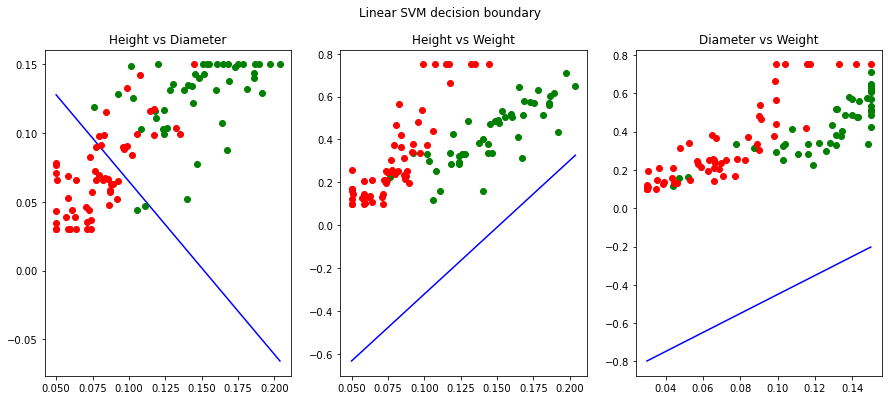

In [218]:
# Plotting 2D projections of data and decision boundary
plt.figure(figsize=(15,6))
plt.suptitle("Linear SVM decision boundary")

plt.subplot(131)
plt.title('Height vs Diameter')

w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.array([train_features[:,0].min(),train_features[:,0].max()])
yy = a*xx - (clf.intercept_[0])/w[1]
plt.plot(xx,yy,"b-")
# Plot data points
plt.plot(train_features[:,0][is_plastic], train_features[:,1][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,1][is_other], "ro",label="not plastic")


plt.subplot(132)
plt.title('Height vs Weight')

w = clf.coef_[0]
a = -w[0]/w[2]
xx = np.array([train_features[:,0].min(),train_features[:,0].max()])
yy = a*xx - (clf.intercept_[0])/w[2]
plt.plot(xx,yy,"b-")

# Plot data points
plt.plot(train_features[:,0][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,2][is_other], "ro",label="not plastic")


plt.subplot(133)
plt.title('Diameter vs Weight')

w = clf.coef_[0]
a = -w[1]/w[2]
xx = np.array([train_features[:,1].min(),train_features[:,1].max()])
yy = a*xx - (clf.intercept_[0])/w[2]
plt.plot(xx,yy,"b-")

# Plot data points
plt.plot(train_features[:,1][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,1][is_other], train_features[:,2][is_other], "ro",label="not plastic")

plt.savefig("./lin_svm_clf.jpeg")
plt.show()

## ------------------------------------ QUESTION 2-B ------------------------------------

In [219]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,20,50,100], 
                            kernal='rbf',
                            gamma='scale',
                            perf_comp=perf_comp)

For C = 1 -----
Training Accuracy: 54.9%
Testing Accuracy: 66.67%

For C = 5 -----
Training Accuracy: 69.61%
Testing Accuracy: 50.0%

For C = 10 -----
Training Accuracy: 70.59%
Testing Accuracy: 61.11%

For C = 20 -----
Training Accuracy: 87.25%
Testing Accuracy: 66.67%

For C = 50 -----
Training Accuracy: 96.08%
Testing Accuracy: 100.0%

For C = 100 -----
Training Accuracy: 96.08%
Testing Accuracy: 100.0%



In [220]:
perf_comp['acc_train'], perf_comp['acc_test']

([54.90196078431373,
  69.6078431372549,
  70.58823529411765,
  87.25490196078431,
  96.07843137254902,
  96.07843137254902],
 [66.66666666666666,
  50.0,
  61.111111111111114,
  66.66666666666666,
  100.0,
  100.0])

In [221]:
## choose the best model
clf_nl = perf_comp['model'][4]

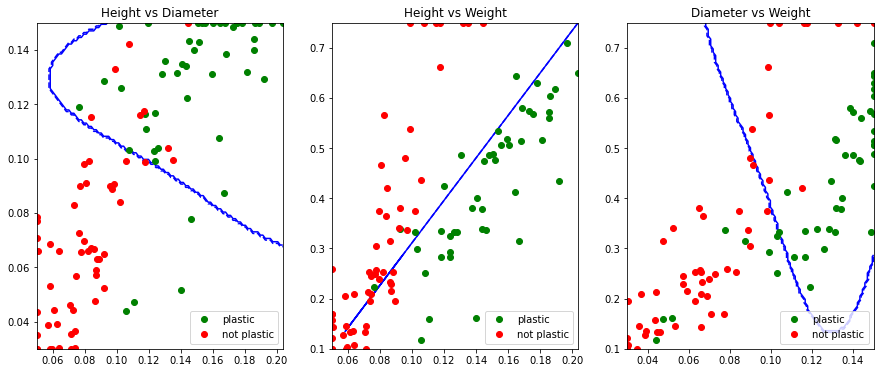

In [222]:
plt.figure(figsize=(15,6))

ax_pt_1 = np.linspace(train_features[:,0].min(), train_features[:,0].max(), 100).T
ax_pt_2 = np.linspace(train_features[:,1].min(), train_features[:,1].max(), 100).T
ax_pt_3 = np.linspace(train_features[:,2].min(), train_features[:,2].max(), 100).T
ax_pt_4 = np.linspace(train_features[:,3].min(), train_features[:,3].max(), 100).T

p1, p2 = np.meshgrid(ax_pt_1, ax_pt_2)
p3, p4 = np.meshgrid(ax_pt_3, ax_pt_4)

X_list = [p1,p2,p3,p4] 
value = np.zeros(p1.shape)

for i in range(p1.shape[1]):
    this_X = np.column_stack((p1[:, i], p2[:, i],p3[:,i],p4[:,i]))
    pred_nl = [1 if i=='Plastic' else -1 for i in clf_nl.predict(this_X)]
    value[:, i] = np.array(pred_nl)

plt.subplot(131)
plt.title('Height vs Diameter')

plt.contour(X_list[0], X_list[1], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,0][is_plastic], train_features[:,1][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,1][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.subplot(132)
plt.title('Height vs Weight')

plt.contour(X_list[0], X_list[2], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,0][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,2][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.subplot(133)
plt.title('Diameter vs Weight')

plt.contour(X_list[1], X_list[2], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,1][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,1][is_other], train_features[:,2][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.savefig("./non_lin_svm_clf.jpeg")
plt.show()

### OBSERVATION - 
- As expected and observed earleir, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 20, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 50.__
- We can clearly see that for C = 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.

## ------------------------------------ QUESTION 3-B ------------------------------------

In [223]:
import numpy as np

def entropy(y):
    """
    Calculates the entropy of a label array.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X, y, feature_index, threshold):
    """
    Calculates the information gain of a split on a given feature and threshold.
    """
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    left_y, right_y = y[left_mask], y[right_mask]
    left_entropy, right_entropy = entropy(left_y), entropy(right_y)
    left_size, right_size = len(left_y), len(right_y)
    total_entropy = (left_size / len(y)) * left_entropy + (right_size / len(y)) * right_entropy
    return entropy(y) - total_entropy

def find_best_split(X, y):
    """
    Finds the best feature and threshold to split the data.
    """
    best_feature_index, best_threshold, best_info_gain = None, None, -1
    for feature_index in range(X.shape[1]):
        unique_values = np.unique(X[:, feature_index])
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2
        for threshold in thresholds:
            info_gain = information_gain(X, y, feature_index, threshold)
            if info_gain > best_info_gain:
                best_feature_index, best_threshold, best_info_gain = feature_index, threshold, info_gain
    return best_feature_index, best_threshold

def build_tree(X, y, depth=0, max_depth=None):
    """
    Builds a decision tree recursively.
    """
    if depth == max_depth or len(np.unique(y)) == 1:
        return np.bincount(y).argmax()
    feature_index, threshold = find_best_split(X, y)
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)
    return (feature_index, threshold, left_subtree, right_subtree)
    
def predict(tree, example):
    """Predicts the labels of an array of single data point using a decision tree."""
    if type(tree) == tuple:
        attribute, threshold, left_subtree, right_subtree = tree
        if example[attribute] <= threshold:
            return predict(left_subtree, example)
        else:
            return predict(right_subtree, example)
    else:
        return tree

def predict_all(tree, X):
    """Predicts the labels of an array of data points using a decision tree."""
    y_pred = []
    for example in X:
        y_pred.append(predict(tree, example))
    return y_pred

## ------------------------------------ QUESTION 3-C ------------------------------------

In [224]:
def labels_str_to_int(labels):
    """
    convert string labels to integer to pass to the decision tree classifier
    
    Parameters
    ----------
    labels - numpy array of strings
    
    Returns
    -------
    labels_int - numpy array of integers
    """
    labels_int = []
    for i in labels:
        if i=='Plastic':
            labels_int.append(0)
        elif i=='Ceramic':
            labels_int.append(1)
        elif i=='Metal':
            labels_int.append(2)
        
    return np.array(labels_int)

In [225]:
train_labels_int = labels_str_to_int(train_labels)
test_labels_int = labels_str_to_int(test_labels)

In [226]:
perf_comp_dt = {'model':[],'max_depth':[],'acc_train':[],'acc_test':[]}

"""
Iterating the max_depth through 1 to 8 as required in the problem
Later, we can compare the model performance based on various depth levels
to see which depth level is best performing for the given dataset
and if the model is overfitting as we increase the depth
"""

for max_depth in range(1,9):
    dec_tree = build_tree(train_features, train_labels_int, max_depth=max_depth)

    pred_train = predict_all(dec_tree, train_features)
    acc_train = 100*np.mean(pred_train == train_labels_int)
    
    pred_test = predict_all(dec_tree, test_features)
    acc_test = 100*np.mean(pred_test == test_labels_int)
    
    perf_comp_dt['model'].append(dec_tree)
    perf_comp_dt['max_depth'].append(max_depth)
    perf_comp_dt['acc_train'].append(acc_train)
    perf_comp_dt['acc_test'].append(acc_test)

In [227]:
for i in zip(perf_comp_dt['acc_train'], perf_comp_dt['acc_test'], perf_comp_dt['max_depth']):
    print(f'For Max Depth = {i[2]}, training accuracy = {round(i[0],2)}, testing accuracy = {round(i[1],2)}')

For Max Depth = 1, training accuracy = 72.55, testing accuracy = 55.56
For Max Depth = 2, training accuracy = 82.35, testing accuracy = 77.78
For Max Depth = 3, training accuracy = 88.24, testing accuracy = 77.78
For Max Depth = 4, training accuracy = 88.24, testing accuracy = 77.78
For Max Depth = 5, training accuracy = 95.1, testing accuracy = 77.78
For Max Depth = 6, training accuracy = 98.04, testing accuracy = 88.89
For Max Depth = 7, training accuracy = 100.0, testing accuracy = 94.44
For Max Depth = 8, training accuracy = 100.0, testing accuracy = 94.44


### ------------ CONCLUSION ------------

- As expected, while increasing the max depth, the training as well as testing accuracies increase.
- After some time, at max depth level 6, the increase in training accuracy and testing accuracy is relatively slower.
- We can also observe that for max depths 2,3,4,5 the testing accuracies are consistent.
- This can mean that the features at these depths are not learning meaningful information for testing data.
- Finally, the model seems to learn well at max_depth of 6 and 7 and does not appear to be overfitting as the training and testing accuracies are consistent with each other.